# Estadística sobre las Trayectorias.
Varias medidas en busca de significado estadístico de los cálculos de las trayectorias de los Centros de Masa, definidos en el Notebook TrackingtheTracks.

In [1]:
using JLD
using PyPlot
using StatsBase, Statistics
push!(LOAD_PATH,"./")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "./"

In [2]:
cm2p=1/2.54;

In [3]:
using TrayectoriasAux

In [4]:
Datos=load("../JLDFiles/4AP/DatosLFP4APusadosPaper-Tray-todas.jld")

Dict{String,Any} with 3 entries:
  "nota"              => "longitud minima fue 3, peso minimo fue 5 "
  "CatenarioPositivo" => Dict{Integer,Array{Any,N} where N}(288=>[41.2486 58.15…
  "CatenarioNegativo" => Dict{Integer,Array{Any,N} where N}(306=>[31.5812 29.32…

In [5]:
CatenarioPozos=Datos["CatenarioNegativo"]
CatenarioFuentes=Datos["CatenarioPositivo"];

In [6]:
CatenarioFuentes[3]

5×4 Array{Any,2}:
 21.8088  60.4126  140.72   157.0
 21.8323  60.2707  140.121  158.0
 22.4979  60.1031  192.302  159.0
 21.9595  59.5374  126.444  160.0
 21.2319  60.7021  119.047  161.0

In [7]:
dispozos=TrayectoriasAux.distprom(CatenarioPozos);
disfuentes=TrayectoriasAux.distprom(CatenarioFuentes)
length(disfuentes)

597

In [22]:
function diferenciastray(trays::Dict)
    result=Dict{Int, Array{Float64}}()
    for k in keys(trays)
        v=trays[k]
        tantos=size(v, 1)
        result[k]=[0.0 0.0 0.0]
        for j=2:tantos
            dq=dist(v[j-1,1],v[j-1,2],v[j,1],v[j,2])
            dt=v[j,4]-v[1,4]
            di=v[j,3]-v[j-1,3]
            ds=[dq dt di]
           # print(ds)
            result[k]=vcat(result[k], ds)
        end
        result[k]=result[k][2:end,:]
  
    end
    return result
end

diferenciastray (generic function with 1 method)

In [23]:
ddfuentes=diferenciastray(CatenarioFuentes)
ddpozos=diferenciastray(CatenarioPozos);

In [25]:
distie=42 #distancia inter electrodo
freq=7.022
cajas=0:25:400

tantos=length(dispozos)
vspozos=zeros(tantos)


for j in 1:tantos
    vspozos[j]=dispozos[j]
end
# la vs esta en unidades "de la MEA", asi que... escalas
vspozos=vspozos*distie*freq;
histvpozos=fit(Histogram, vspozos, cajas,closed=:right)

tantos=length(disfuentes)
vsfuentes=zeros(tantos)
for j in 1:tantos
    vsfuentes[j]=disfuentes[j]
end
# la vs esta en unidades "de la MEA", asi que... escalas

vsfuentes=vsfuentes*distie*freq;
histvfuentes=fit(Histogram, vsfuentes, cajas,closed=:right)


Histogram{Int64,1,Tuple{StepRange{Int64,Int64}}}
edges:
  0:25:400
weights: [2, 3, 9, 13, 23, 58, 58, 76, 81, 58, 67, 42, 31, 20, 14, 17]
closed: right
isdensity: false

In [26]:
centroshistopozos=(histvpozos.edges[1][2:end]+histvpozos.edges[1][1:end-1])/2
centroshistofuentes=(histvfuentes.edges[1][2:end]+histvfuentes.edges[1][1:end-1])/2

ancho=15


15

In [27]:
mvp, mvf = (round(Int, mean(vspozos)), round(Int, mean(vsfuentes)) )

(205, 228)

In [28]:
for k in keys(matplotlib.rcParams)
    if occursin("font", k)
    print(k, " ->", matplotlib.rcParams[k], "\n")
    end
end
matplotlib.rcParams["font.family"]=["Palatino"]
matplotlib.rcParams["legend.fontsize"]=8
matplotlib.rcParams["font.size"]=8

font.family ->["sans-serif"]
font.fantasy ->["Comic Sans MS", "Chicago", "Charcoal", "Impact", "Western", "Humor Sans", "xkcd", "fantasy"]
font.serif ->["DejaVu Serif", "Bitstream Vera Serif", "Computer Modern Roman", "New Century Schoolbook", "Century Schoolbook L", "Utopia", "ITC Bookman", "Bookman", "Nimbus Roman No9 L", "Times New Roman", "Times", "Palatino", "Charter", "serif"]
legend.title_fontsize ->nothing
font.weight ->normal
font.monospace ->["DejaVu Sans Mono", "Bitstream Vera Sans Mono", "Computer Modern Typewriter", "Andale Mono", "Nimbus Mono L", "Courier New", "Courier", "Fixed", "Terminal", "monospace"]
font.cursive ->["Apple Chancery", "Textile", "Zapf Chancery", "Sand", "Script MT", "Felipa", "cursive"]
font.sans-serif ->["DejaVu Sans", "Bitstream Vera Sans", "Computer Modern Sans Serif", "Lucida Grande", "Verdana", "Geneva", "Lucid", "Arial", "Helvetica", "Avant Garde", "sans-serif"]
svg.fonttype ->path
font.style ->normal
pgf.rcfonts ->true
font.variant ->normal
leg

8

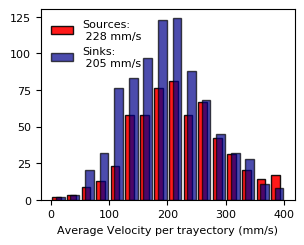

In [29]:

fu=figure(figsize=(8*cm2p,6.5*cm2p))
fs=8

xlabel("Average Velocity per trayectory (mm/s)", fontsize=fs)

#ylabel("Total Count", fontsize=fs)
xticks(fontsize=fs)
yticks(fontsize=fs)

bar(centroshistofuentes.-2, histvfuentes.weights, ancho, color="red", 
    alpha=0.9, edgecolor="black", lw=1, label="Sources:\n $mvf mm/s")
bar(centroshistopozos.+4, histvpozos.weights, ancho, 
    color="darkblue", alpha=0.7, edgecolor="black", lw=1, label="Sinks:\n $mvp mm/s")
#annotate()
legend(loc=2, fontsize=fs, frameon=false)

tight_layout()
savefig("HistogramVelocities-4AP.svg",dpi=90)
savefig("HistogramVelocities-4AP.png",dpi=90)

In [30]:
std(vspozos), std(vsfuentes)

(79.05174252682552, 86.68048031196018)

In [31]:
dist2D(xx::Array, yy::Array)=dist(xx[1], yy[1], xx[2], yy[2])

function distanciasAcumuladas(cadena::Array)
    jmax,bla=size(cadena)
    result=zeros(jmax)
    acu=0
    for j=1:jmax-1
        acu+=dist2D(cadena[j,:],cadena[j+1,:])
        result[j+1]=acu
    end
    return result
end

distanciasAcumuladas (generic function with 1 method)

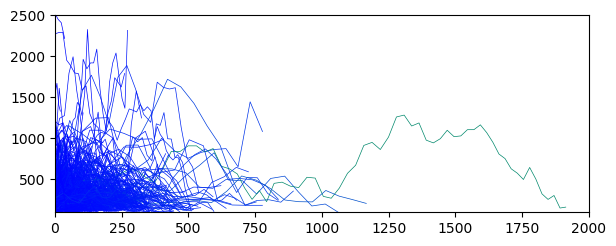

In [32]:
PyPlot.ion()
figure(figsize=(17.5*cm2p,6.5*cm2p))
#axis("equal")
#xlim(0.0,25.0)
xmaa=2000
xlim(0,xmaa)
ylim(90,2500.0)

for p in values(CatenarioPozos)
    #println(p)
    #offset=p[1,4]./100
    xxpos=distanciasAcumuladas(p)#.+offset
    xme=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    parcor=1.5*xme/xmaa
    cores=(0, 0.7*parcor, 1-parcor*parcor)
    plot(xxpos,yypos, lw=0.5, color=cores)
end


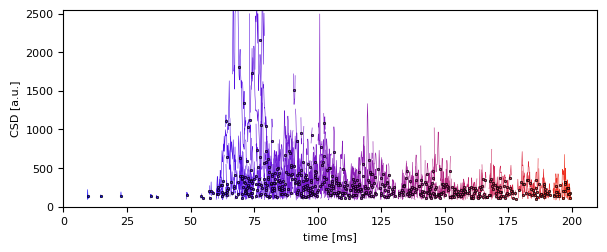

In [33]:
figure(figsize=(17.5*cm2p,6.5*cm2p))

#axis("equal")
tmax=210
xlim(0,tmax)
ylim(-0.0,2550.0)
fs=8
xlabel("time [ms]",fontsize=fs)
ylabel("CSD [a.u.]", fontsize=fs)
xticks(fontsize=fs)
yticks(fontsize=fs)
xlim(0,tmax)

for p in values(CatenarioFuentes)
    xxpos=p[:,4]./7.022
    timecentro=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    gordocentro=mean(yypos)
    parcor=timecentro/tmax
    cores=(parcor, 0.2*parcor, 1-parcor*parcor)
   plot(xxpos,yypos, c=cores, lw=0.4, zorder=1)
    #print(timecentro)
    scatter(timecentro,gordocentro, color=cores, s=3 ,
        lw=0.5, edgecolor="black", zorder=10)
end

savefig("Fuentes4AP-tiempovsintensidad.svg", dpi=90)
savefig("Fuentes4AP-tiempovsintensidad.png", dpi=90)

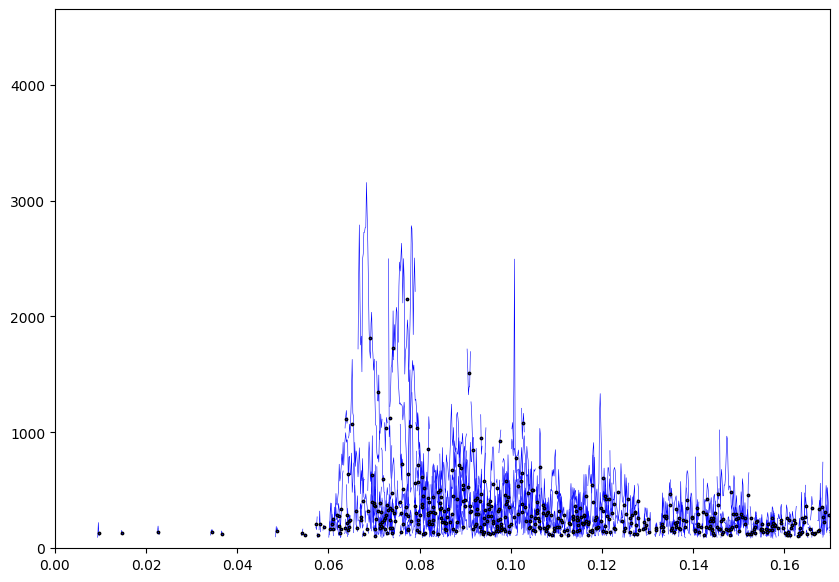

In [34]:

figure(figsize=(10,7))
#axis("equal")
xlim(0.0,0.170)
ylim(0.0,4650.0)

for p in values(CatenarioFuentes)
    xxpos=p[:,4]./7022
    timecentro=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
        gordocentro=mean(yypos)

    
       parcor=timecentro/tmax
    cores=(parcor, 0.2*parcor, 1-parcor*parcor)
    plot(xxpos,yypos, c=cores, lw=0.4, zorder=1)
    #print(timecentro)
    scatter(timecentro,gordocentro, color=cores, s=3 ,
        lw=1, edgecolor="k", zorder=10)

    #plot(xxpos,yypos)
end

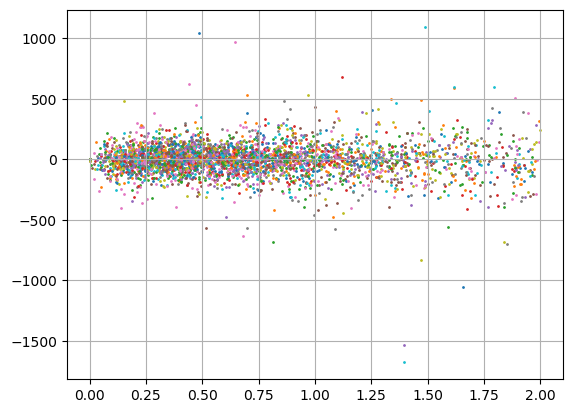

In [48]:
for v in values(ddfuentes)
    scatter(v[:,1],v[:,3], s=1)
end
grid()